In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
heart_df=pd.read_csv("C:/Users/dong.bing/framingham.csv")
#heart_df.drop(['education'],axis=1,inplace=True)
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
heart_df.rename(columns={'male':'gender'},inplace=True)

In [5]:
heart_df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
#assess missing value
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(heart_df)

Your selected dataframe has 16 columns and 4240 Rows.
There are 7 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
glucose,0,388,9.2,388,9.2,float64
education,0,105,2.5,105,2.5,float64
BPMeds,4063,53,1.2,4116,97.1,float64
totChol,0,50,1.2,50,1.2,float64
cigsPerDay,2145,29,0.7,2174,51.3,float64
BMI,0,19,0.4,19,0.4,float64
heartRate,0,1,0.0,1,0.0,float64


In [8]:
heart_df_final=heart_df.dropna()

In [9]:
missing_zero_values_table(heart_df_final)

Your selected dataframe has 16 columns and 3658 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [10]:
heart_df_final.corr()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
gender,1.000000,-0.024412,0.017729,0.206114,0.330322,-0.052124,-0.002312,0.001424,0.013819,-0.070321,-0.045358,0.051872,0.073111,-0.115285,0.002940,0.091688
age,-0.024412,1.000000,-0.159499,-0.210771,-0.189295,0.134732,0.050893,0.306239,0.109092,0.268252,0.388267,0.208283,0.137511,-0.002722,0.118349,0.233983
education,0.017729,-0.159499,1.000000,0.025251,0.013790,-0.013739,-0.030386,-0.078828,-0.039627,-0.013522,-0.124360,-0.058059,-0.137555,-0.064214,-0.031998,-0.063279
currentSmoker,0.206114,-0.210771,0.025251,1.000000,0.773913,-0.051923,-0.038150,-0.108078,-0.041849,-0.051034,-0.134428,-0.115955,-0.159821,0.050841,-0.053242,0.019165
cigsPerDay,0.330322,-0.189295,0.013790,0.773913,1.000000,-0.046504,-0.036286,-0.070460,-0.036961,-0.030400,-0.094781,-0.056746,-0.087395,0.064030,-0.053726,0.052014
BPMeds,-0.052124,0.134732,-0.013739,-0.051923,-0.046504,1.000000,0.113125,0.262910,0.049066,0.094083,0.271263,0.199630,0.105642,0.012889,0.054232,0.089152
prevalentStroke,-0.002312,0.050893,-0.030386,-0.038150,-0.036286,0.113125,1.000000,0.066057,0.009625,0.012736,0.061070,0.055834,0.036496,-0.017019,0.016061,0.048366
prevalentHyp,0.001424,0.306239,-0.078828,-0.108078,-0.070460,0.262910,0.066057,1.000000,0.080556,0.166655,0.697675,0.617734,0.302949,0.146818,0.086942,0.181387
diabetes,0.013819,0.109092,-0.039627,-0.041849,-0.036961,0.049066,0.009625,0.080556,1.000000,0.048451,0.102552,0.050686,0.089009,0.060984,0.614820,0.093431
totChol,-0.070321,0.268252,-0.013522,-0.051034,-0.030400,0.094083,0.012736,0.166655,0.048451,1.000000,0.219925,0.174422,0.121056,0.093053,0.049884,0.091338


In [13]:
print(heart_df_final.groupby('TenYearCHD').size())

TenYearCHD
0    3101
1     557
dtype: int64


In [15]:
X=heart_df_final[heart_df_final.columns]
X=X.drop(columns=['TenYearCHD'])
X.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [17]:
Y=heart_df_final['TenYearCHD']
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [18]:
from sklearn.feature_selection import SelectKBest,chi2
test=SelectKBest(score_func=chi2,k=10)
fit=test.fit(X,Y)
print(fit.scores_)

[ 17.10775088 296.20034419   7.73328653   0.68647384 155.7983075
  28.19156867   8.5078328   82.84545536  31.06762071 250.49020507
 669.13602117 142.52181427  15.78543627   2.91728745 379.91423514]


In [19]:
X.columns

Index(['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [21]:
X=heart_df_final[['age','cigsPerDay','totChol','sysBP','diaBP','glucose']]
X.head()

,age,cigsPerDay,totChol,sysBP,diaBP,glucose
0,39,0.0,195.0,106.0,70.0,77.0
1,46,0.0,250.0,121.0,81.0,76.0
2,48,20.0,245.0,127.5,80.0,70.0
3,61,30.0,225.0,150.0,95.0,103.0
4,46,23.0,285.0,130.0,84.0,85.0


C:\Users\dong.bing\AppData\Local\Continuum\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6400DF588>,
      dtype=object)

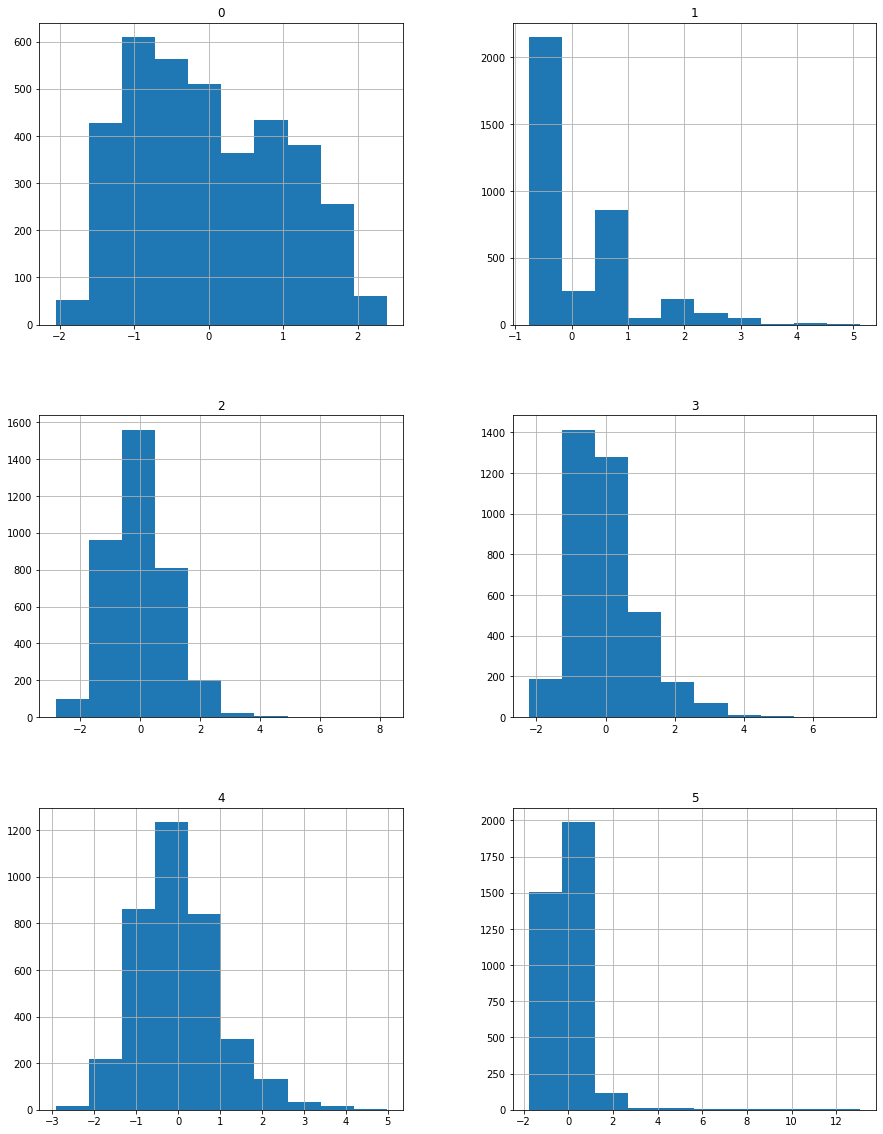

In [22]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X=sc_x.fit_transform(X)

#histograms the dataset
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
pd.DataFrame(X).hist(ax = ax)

In [24]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('KN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVC',SVC()))

In [25]:
results=[]
names=[]
scoring='accuracy'
for name,model in models:
    kfold=KFold(n_splits=10,random_state=7)
    cv_result=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
    results.append(cv_result)
    names.append(name)
    msg=("%s: %f (%f)" % (name,cv_result.mean(),cv_result.std()))
    print(msg)

C:\Users\dong.bing\AppData\Local\Continuum\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dong.bing\AppData\Local\Continuum\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dong.bing\AppData\Local\Continuum\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dong.bing\AppData\Local\Continuum\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 

LR: 0.852374 (0.018165)
DT: 0.748758 (0.030153)
KN: 0.833240 (0.019112)
NB: 0.827221 (0.021678)


C:\Users\dong.bing\AppData\Local\Continuum\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dong.bing\AppData\Local\Continuum\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dong.bing\AppData\Local\Continuum\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale

SVC: 0.847180 (0.017508)


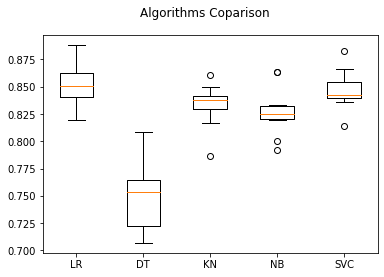

In [26]:
import matplotlib.pyplot as plt
fig=plt.figure()
fig.suptitle('Algorithms Coparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [28]:
my_model=LogisticRegression()
my_model.fit(x_train,y_train)

C:\Users\dong.bing\AppData\Local\Continuum\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
result=my_model.score(x_test,y_test)
print('Accuracy : ' ,(result*100))

Accuracy :  84.42622950819673


In [31]:
import sklearn
new_features=heart_df_final[['age','cigsPerDay','totChol','sysBP','diaBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

C:\Users\dong.bing\AppData\Local\Continuum\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[626   2]
 [ 99   5]]


In [33]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8620218579234973